# student ID: 1062067s  
# name: 呂柏邑  
# team name: what happened?  
snapshot of your Private Leaderboard score

![Image of Yaktocat](./2018-12-05.1.38.07.png)

---

# Outline

## Discussion
+ Result Comparision
+ Did you encounter overfitting or underfitting problem? How did you against it
+ Any special model and process method you tried during your experiments

## Pre-processing
+ read data
+ enumerate data
+ clean the data

## Feature Engineering
+ bag of word
+ w2v
+ glove (pre-trained w2v)
+ w2v & TFIDF
+ word embedding & w2v
+ word embedding & glove

## Modeling
+ Decision Tree
+ Multinomial Naive Bayes
+ Deep learning
    + Dense
    + LSTM

---

# Discussion

## Result Comparision
word embedding & w2v + LSTM >  
word embedding & glove + LSTM >  
Bag of Word >  
glove = w2v = w2v & TFIDF

The best try is using word embedding & w2v + LSTM
+ embedding dimension is 100

## Did you encounter overfitting or underfitting problem? How did you against it
Generally not underfitting, if underfitting, simply make more epoch / make model more complex or modify input.  
it means: 
1. your input is not helping the model to distinguish between differernt emotions.
2. your model is too simple<br><br>

The challenging problem is overfitting, if I didn't add dropout layer, it usually goes into overfitting. (I use validation to see if overfitting occurs.)  
the solution to this is:
1. add dropout layer to prevent the model trains too well for training data set; but it turns out, the convergence is growing slower
2. change learing rate, decreasing learning rate helps finding more reliable result
3. utilize regulization (but not guaranty to have better result, it provide resistance to overfitting)


## Any special model and process method you tried during your experiments
+ optimizer do have a strong impact on speeding up the training process
   + I found that Adamax is better than adam
+ loss function is correlated with the last layer
   + if using binary_crossentropy, the last layer should be sigmoid (instead of softmax)
      + and the accuracy: binary_crossentropy >> categorical_crossentropy, but get similar result for same epoch / batch size
   + if using categorical_crossentropy, the last layer should be softmax
+ the fewer the batch size is, the better result it will gain. But the convergence decreases.
+ the emotion is imbalanced as shown below, but if useing undersampling or oversampling, it is not going to gain better result, which is a bit strange
+ the data itself contains duplicate, but not exceed 4000, so I didn't do anything to it; and it should be removed (but not the main reason for the low accuracy)

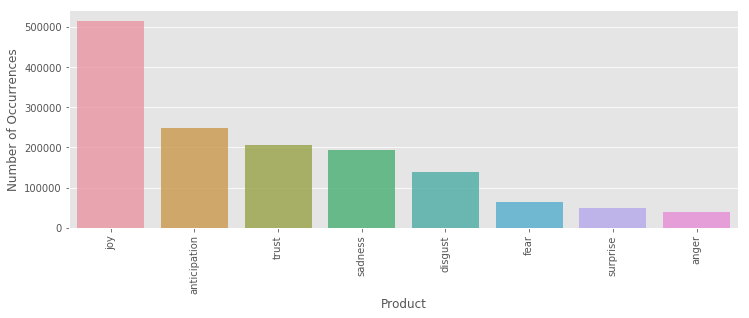

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

cnt_pro = train_df['emotion'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Product', fontsize=12)
plt.xticks(rotation=90)
plt.show()

## Some noise example, which is not eliminate at the model
(could done better if tries to cinsider it)
i.e. try to see if some sentence pattern occurs in most of emotion, then it might not be useful, should taken out

In [54]:
train_df[train_df['clean_text'].str.contains('867')]

,hashtags,text,tweet_id,emotion,identification,replaceLabel,replaceLabel_tokenized,clean_text,tokenized
15763,"[submission, onceakytyalwaysakyty, application...",❤Call me on WhatsApp: +1(867)322-3045 for sext...,0x1df0d2,trust,train,❤Call me on WhatsApp: +1(867)322-3045 for sext...,"[❤, Call, me, on, WhatsApp, :, +1(867)322-3045...",❤ call whatsapp +1(867)322-3045 sext nudes ❤ s...,"[❤, call, whatsapp, +1(867)322-3045, sext, nud..."
86252,"[ugly, karbi, lonely, auntiekim]",❤❤Call me on WhatsApp: +18673223045 for sext a...,0x31c559,sadness,train,❤❤Call me on WhatsApp: +18673223045 for sext a...,"[❤, ❤, Call, me, on, WhatsApp, :, +18673223045...",❤ ❤ call whatsapp +18673223045 sext nudes ❤ ❤ ...,"[❤, ❤, call, whatsapp, +18673223045, sext, nud..."
135691,"[lust, spoiled, bigbreasts, session]",❤❤Call me on WhatsApp for sext and nudes: +186...,0x32acac,joy,train,❤❤Call me on WhatsApp for sext and nudes: +186...,"[❤, ❤, Call, me, on, WhatsApp, for, sext, and,...",❤ ❤ call whatsapp sext nudes +18673223045 ❤ lu...,"[❤, ❤, call, whatsapp, sext, nudes, +186732230..."
157219,"[trust, cumdump, house]",❤Call me on WhatsApp for sext and nudes: +1867...,0x2afbbd,trust,train,❤Call me on WhatsApp for sext and nudes: +1867...,"[❤, Call, me, on, WhatsApp, for, sext, and, nu...",❤ call whatsapp sext nudes +18673223045 ❤ trus...,"[❤, call, whatsapp, sext, nudes, +18673223045,..."
300925,"[issarae, webcamsex, happy, evamarie]",❤❤Call me on WhatsApp for sext and nudes: +186...,0x233add,joy,train,❤❤Call me on WhatsApp for sext and nudes: +186...,"[❤, ❤, Call, me, on, WhatsApp, for, sext, and,...",❤ ❤ call whatsapp sext nudes +18673223045 ❤ ❤ ...,"[❤, ❤, call, whatsapp, sext, nudes, +186732230..."
329645,"[blackstud, thankful, thejunkyarddancecrew]",❤❤Call me on WhatsApp for sext and nudes: +1(8...,0x2ad025,trust,train,❤❤Call me on WhatsApp for sext and nudes: +1(8...,"[❤, ❤, Call, me, on, WhatsApp, for, sext, and,...",❤ ❤ call whatsapp sext nudes +1(867)322-3045 ❤...,"[❤, ❤, call, whatsapp, sext, nudes, +1(867)322..."
395901,"[purr, سناب, pride, kong]",❤Call me on WhatsApp: +1(867)322-3045 for sext...,0x36dc28,trust,train,❤Call me on WhatsApp: +1(867)322-3045 for sext...,"[❤, Call, me, on, WhatsApp, :, +1(867)322-3045...",❤ call whatsapp +1(867)322-3045 sext nudes ❤ ❤...,"[❤, call, whatsapp, +1(867)322-3045, sext, nud..."
432009,"[disco, brandmarketing, trust, سكسيه]",❤Call me on WhatsApp for sext and nudes: +1(86...,0x313cdd,trust,train,❤Call me on WhatsApp for sext and nudes: +1(86...,"[❤, Call, me, on, WhatsApp, for, sext, and, nu...",❤ call whatsapp sext nudes +1(867)322-3045 ❤ d...,"[❤, call, whatsapp, sext, nudes, +1(867)322-30..."
500132,"[submission, hinge, lilsquirt, pure]",❤❤Call me on WhatsApp for sext and nudes: +1(8...,0x1d45ff,trust,train,❤❤Call me on WhatsApp for sext and nudes: +1(8...,"[❤, ❤, Call, me, on, WhatsApp, for, sext, and,...",❤ ❤ call whatsapp sext nudes +1(867)322-3045 ❤...,"[❤, ❤, call, whatsapp, sext, nudes, +1(867)322..."
623618,"[submission, suckmeoff, ثلاثينيه]",❤Call me on WhatsApp for sext and nudes: +1(86...,0x2951fa,trust,train,❤Call me on WhatsApp for sext and nudes: +1(86...,"[❤, Call, me, on, WhatsApp, for, sext, and, nu...",❤ call whatsapp sext nudes +1(867)322-3045 ❤ s...,"[❤, call, whatsapp, sext, nudes, +1(867)322-30..."


---

# Description

## Pre-processing

### read data  
simply merge all data set together to form a single pandas data frame
and also split the data set into train/test data set

### enumerate data
play with the data set, try to find out some clues for cleaning

##### Things have tried:
+ replacing \< LH > with predict emotion, and utilize w2v to see the similar word to replaced emotion
   > but turns out, words are not really distinguish between emotions (using t-SNE to plot, some glues together)  
   > and also, hashtag symbol '#' should also be removed (some are duplicate)
+ count the occurrence of words, and trys to see if any useful or not helpful
   > should also remove duplicate '#'  
   > the word unique list is too high, need a way to reduce it
   
##### Conclusion:
+ replacing \< LH >, since it is considered as a noize (occurs everywhere, not helping to distinguish)
+ only consider the words both exist in train and test (otherwise, might use some word that is not popular to estimate)

### clean the data


+ some words like 'the', 'to', 'of', which is conjunctions, should be removed.
+ words should all be downcase. (prevent word to be duplicate by one upper-case and one lower-case, i.e. Happy, happy)  
+ remove meaningless punctuation
+ consider only words exist both in train and test

## Feature Engineering

#### Bag of Word
using word count to represent sentence

#### Word to Vector (w2v)
using w2v, and by sum of the word vectors in sentence to represent sentence

#### glove (pre-trained w2v)
instead of training w2v by the data, utilize pre-trained w2v vector and sum of the word vectors in sentence to represent sentence

#### w2v & TFIDF
using sum of [word vector * word TF-IDF] to represent sentence

#### word embedding & w2v
utilizing word embedding, i.e., I -> 1 ; am -> 2 , ...
each word in the sentence will be transformed into integer, and the integer will be used to find corresponding word vector

#### word embedding & glove
same as word embedding & w2v, but use pre-trained w2v

## Modeling

+ Decision Tree
+ Multinomial Naive Bayes
+ Deep learning
    + Dense (BOW, w2v, glove)
    + LSTM (word embedding & w2v / word embedding & glove)

---

# Code

## Pre-processing

### Read data

In [1]:
import pandas as pd

# reading from file
sampleSubmission = pd.read_csv('./input/sampleSubmission.csv')
data_identification = pd.read_csv('./input/data_identification.csv')
emotion = pd.read_csv('./input/emotion.csv')

#test input
print(sampleSubmission.head())
print(data_identification.head())
print(emotion.head())

         id   emotion
0  0x2c7743  surprise
1  0x2c1eed  surprise
2  0x2826ea  surprise
3  0x356d9a  surprise
4  0x20fd95  surprise
   tweet_id identification
0  0x28cc61           test
1  0x29e452          train
2  0x2b3819          train
3  0x2db41f           test
4  0x2a2acc          train
   tweet_id       emotion
0  0x3140b1       sadness
1  0x368b73       disgust
2  0x296183  anticipation
3  0x2bd6e1           joy
4  0x2ee1dd  anticipation


In [2]:
import json
from pandas.io.json import json_normalize

d = pd.read_json('./input/tweets_DM.json', lines=True)
tweets_DM = json_normalize(d['_source'])

tweets_DM.head()

,tweet.hashtags,tweet.text,tweet.tweet_id
0,[Snapchat],"People who post ""add me on #Snapchat"" must be ...",0x376b20
1,"[freepress, TrumpLegacy, CNN]","@brianklaas As we see, Trump is dangerous to #...",0x2d5350
2,[bibleverse],"Confident of your obedience, I write to you, k...",0x28b412
3,[],Now ISSA is stalking Tasha 😂😂😂 <LH>,0x1cd5b0
4,[],"""Trust is not the same as faith. A friend is s...",0x2de201


In [3]:
tweets_DM.rename(columns={'tweet.hashtags': 'hashtags', 'tweet.text': 'text', 'tweet.tweet_id': 'tweet_id'}, inplace=True)
tweets_DM.head()

,hashtags,text,tweet_id
0,[Snapchat],"People who post ""add me on #Snapchat"" must be ...",0x376b20
1,"[freepress, TrumpLegacy, CNN]","@brianklaas As we see, Trump is dangerous to #...",0x2d5350
2,[bibleverse],"Confident of your obedience, I write to you, k...",0x28b412
3,[],Now ISSA is stalking Tasha 😂😂😂 <LH>,0x1cd5b0
4,[],"""Trust is not the same as faith. A friend is s...",0x2de201


```python
# merge the data set into one pandas frame
```

In [4]:
tweets_DM = pd.merge(tweets_DM, emotion, how='outer', on=['tweet_id'])
tweets_DM = pd.merge(tweets_DM, data_identification, how='outer', on=['tweet_id'])

In [5]:
tweets_DM.head()

,hashtags,text,tweet_id,emotion,identification
0,[Snapchat],"People who post ""add me on #Snapchat"" must be ...",0x376b20,anticipation,train
1,"[freepress, TrumpLegacy, CNN]","@brianklaas As we see, Trump is dangerous to #...",0x2d5350,sadness,train
2,[bibleverse],"Confident of your obedience, I write to you, k...",0x28b412,NaN,test
3,[],Now ISSA is stalking Tasha 😂😂😂 <LH>,0x1cd5b0,fear,train
4,[],"""Trust is not the same as faith. A friend is s...",0x2de201,NaN,test


```python
# split the data set to train / test
```

In [6]:
tweets_DM_train = tweets_DM[tweets_DM['identification'] == 'train']
tweets_DM_test = tweets_DM[tweets_DM['identification'] == 'test']

```python
# save into pickle
```

In [ ]:
tweets_DM_train.to_pickle("./PickleTrainTestSet/train_df.pkl") 
tweets_DM_test.to_pickle("./PickleTrainTestSet/test_df.pkl")

### enumerate data

```python
# load the data set
```

In [7]:
train_df = pd.read_pickle("./PickleTrainTestSet/train_df.pkl")
test_df = pd.read_pickle("./PickleTrainTestSet/test_df.pkl")

#### replacing < LH > with predict emotion, and utilize w2v to see the similar word to replaced emotion

In [8]:
def replaceLabel(text, emotion):
    temp = text[:]
    temp = temp.replace('<LH>', emotion)
    return temp

In [9]:
from tqdm import tqdm
tqdm.pandas(desc = "progress-bar")

train_df['replaceLabel'] = train_df.progress_apply(lambda x: replaceLabel(x['text'], x['emotion']), axis=1)

progress-bar: 100%|██████████| 1455563/1455563 [01:02<00:00, 23349.14it/s]


```python
# in order to present w2v, first tokenize it
```

In [10]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

train_df['replaceLabel_tokenized'] = train_df['replaceLabel'].progress_apply(lambda x: tknzr.tokenize(x))
train_df.head()

progress-bar: 100%|██████████| 1455563/1455563 [02:02<00:00, 11898.33it/s]


,hashtags,text,tweet_id,emotion,identification,replaceLabel,replaceLabel_tokenized
0,[Snapchat],"People who post ""add me on #Snapchat"" must be ...",0x376b20,anticipation,train,"People who post ""add me on #Snapchat"" must be ...","[People, who, post, "", add, me, on, #Snapchat,..."
1,"[freepress, TrumpLegacy, CNN]","@brianklaas As we see, Trump is dangerous to #...",0x2d5350,sadness,train,"@brianklaas As we see, Trump is dangerous to #...","[@brianklaas, As, we, see, ,, Trump, is, dange..."
2,[],Now ISSA is stalking Tasha 😂😂😂 <LH>,0x1cd5b0,fear,train,Now ISSA is stalking Tasha 😂😂😂 fear,"[Now, ISSA, is, stalking, Tasha, 😂, 😂, 😂, fear]"
3,"[authentic, LaughOutLoud]",@RISKshow @TheKevinAllison Thx for the BEST TI...,0x1d755c,joy,train,@RISKshow @TheKevinAllison Thx for the BEST TI...,"[@RISKshow, @TheKevinAllison, Thx, for, the, B..."
4,[],Still waiting on those supplies Liscus. <LH>,0x2c91a8,anticipation,train,Still waiting on those supplies Liscus. antici...,"[Still, waiting, on, those, supplies, Liscus, ..."


In [11]:
training_corpus = train_df['replaceLabel_tokenized'].values
training_corpus[:3]

array([list(['People', 'who', 'post', '"', 'add', 'me', 'on', '#Snapchat', '"', 'must', 'be', 'dehydrated', '.', 'Cuz', 'man', '...', "that's", 'anticipation']),
       list(['@brianklaas', 'As', 'we', 'see', ',', 'Trump', 'is', 'dangerous', 'to', '#freepress', 'around', 'the', 'world', '.', 'What', 'a', 'sadness', 'sadness', '#TrumpLegacy', '.', '#CNN']),
       list(['Now', 'ISSA', 'is', 'stalking', 'Tasha', '😂', '😂', '😂', 'fear'])],
      dtype=object)

In [12]:
import gensim
from gensim.models import Word2Vec

## setting
vector_dim = 50
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          size=vector_dim, window=window_size,
                          min_count=min_count, iter=training_iter)

In [13]:
emoList = train_df['emotion'].unique().tolist()
emoList

['anticipation',
 'sadness',
 'fear',
 'joy',
 'anger',
 'trust',
 'disgust',
 'surprise']

In [14]:
topn = 500

for i, emo in enumerate(emoList):
    similarList = [emo]
    similarList.extend([word_ for word_, sim_ in word2vec_model.wv.most_similar(emo, topn=topn)])
    if (i == 0):
        df = pd.DataFrame({'label':similarList})
        df['emotion'] = [emo for i in range(topn+1)]
    else:
        df2 = pd.DataFrame({'label':similarList})
        df2['emotion'] = [emo for i in range(topn+1)]
        df = df.append(df2)

/home/lu/anaconda3/envs/NTHU_DataMining/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [15]:
from sklearn.manifold import TSNE

## w2v model
model = word2vec_model

target_words = df['label'].tolist()

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.wv.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model.wv[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

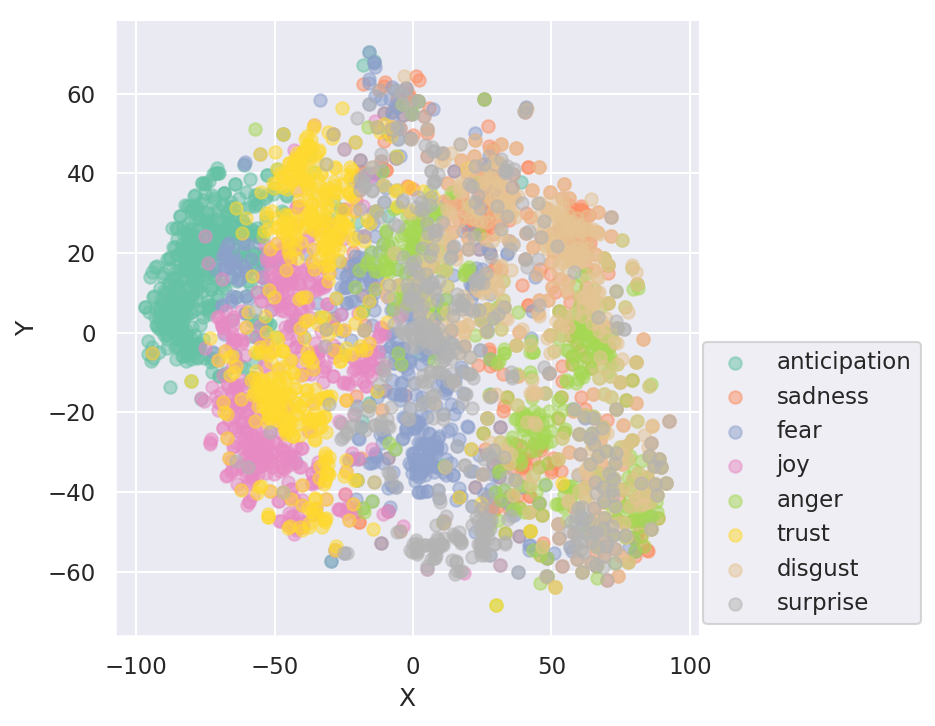

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

df['X'] = X_tsne[:target_size, 0]
df['Y'] = X_tsne[:target_size, 1]

sns.set(rc={'figure.figsize':(7.5,7.5), 'figure.dpi':150})
sns.lmplot( x="X", y="Y", data=df, fit_reg=False, hue='emotion', legend=False, palette="Set2", scatter_kws={'alpha':0.5})
plt.legend(loc='lower right', bbox_to_anchor=(1.4, 0))

Everything just glues together, which indicate that it probably won't give a good result  
(But we can see that, anticipation is really concentrate)

In [25]:
df[df['emotion'] == 'anticipation'].head(10)

,label,emotion,X,Y
0,anticipation,anticipation,-94.317970,-5.126724
1,#Jesus,anticipation,-75.757080,19.811584
2,#God,anticipation,-75.545998,20.535461
3,#Christ,anticipation,-77.481522,20.005302
4,Christ,anticipation,-76.804176,19.974157
5,Jesus,anticipation,-75.571335,19.660305
6,God,anticipation,-74.962860,21.814756
7,#church,anticipation,-81.447029,15.447720
8,salvation,anticipation,-70.450203,24.049555
9,#Faith,anticipation,-73.844513,6.039202


#god and God is duplicate, and they should be consider as the same word, thus '#' should be removed

#### count the occurrence of words, and trys to see if any useful or not helpful

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

# build analyzers (bag-of-words)
BOW = CountVectorizer(analyzer='word', stop_words=None, lowercase=False, tokenizer=tknzr.tokenize)

# apply analyzer to training data
BOW.fit(train_df['text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7f1a583ebcf8>>,
        vocabulary=None)

In [40]:
len(BOW.get_feature_names())

1053489

1053489 unique words, if utilize bag of word for classification, the matrix will be really large. (not practical)

In [36]:
print(BOW.get_feature_names()[:100])

['!', '"', '#', '###10', '###AAP', '###AGNATHAVASI', '###AMAZING', '###AMAZInG', '###ANNAYA', '###AUS', '###AWESOME', '###Acceptance', '###All', '###Amazing', '###Awesome', '###BELIEVE', '###BLESSED', '###BROKE', '###Blessed', '###CALM', '###COOL', '###Congrats', '###Cute', '###DAYUNGFLEXZY', '###DOWN', '###Diana', '###Dream', '###FAITH', '###FOR', '###Family', '###Fantastic', '###For', '###FreebieFriday', '###Frustrated', '###Glad', '###God', '###Gross', '###HAPPY', '###HUGE', '###Happy', '###Hope', "###I'm", '###ILL', '###INDIA', '###IS', '###Is', '###Jesus', '###LOST', '###LOVE', '###LOVe', '###Love', '###Lt', '###ManushiChillar', '###Miss', '###NEWSFLASH', '###Of', '###PL2017', '###PROUD', '###Peace', '###Pray', '###Proud', '###READY', '###SAD', '###SHAME', '###Shame', '###Shutdown', '###Suicidal', '###Surprised', '###THANKS', '###TOOL', '###TRUST', '###Thirsty', '###Thiruvathira', '###USELESS', '###WAITING', '###Waiting', '###Welcome', '###again', '###alone', '###amazing', '###ang

a lot of '#', which means multiple '#' should also be removed

### Clean the data

#### removing \< LH \>, punctuation,  '#' and '@'

In [123]:
import nltk
import string
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(preserve_case=False)

s_word = list(string.punctuation)
s_word.append('<lh>') 
s_word.append('’') 
s_word = set(s_word)

def clean(text):
    result = tknzr.tokenize(text)

    for i, word in enumerate(result):
        temp = word.split('#')        
        for w in temp:
            if w != '':
                result[i] = w
        
    for i, word in enumerate(result):
        temp = word.split('@')
        for w in temp:
            if w != '':
                result[i] = w
    
    result = [word for word in result if not word in s_word]
    result = ' '.join(result)
    return result

In [124]:
train_df['clean_text'] = train_df['text'].progress_apply(lambda x: clean(x))
train_df['tokenized'] = train_df['clean_text'].progress_apply(lambda x: tknzr.tokenize(x))
test_df['clean_text'] = test_df['text'].progress_apply(lambda x: clean(x))
test_df['tokenized'] = test_df['clean_text'].progress_apply(lambda x: tknzr.tokenize(x))

progress-bar: 100%|██████████| 411972/411972 [00:47<00:00, 8688.41it/s]


In [126]:
train_df.head()

,hashtags,text,tweet_id,emotion,identification,replaceLabel,replaceLabel_tokenized,clean_text,tokenized
0,[Snapchat],"People who post ""add me on #Snapchat"" must be ...",0x376b20,anticipation,train,"People who post ""add me on #Snapchat"" must be ...","[People, who, post, "", add, me, on, #Snapchat,...",people who post add me on snapchat must be deh...,"[people, who, post, add, me, on, snapchat, mus..."
1,"[freepress, TrumpLegacy, CNN]","@brianklaas As we see, Trump is dangerous to #...",0x2d5350,sadness,train,"@brianklaas As we see, Trump is dangerous to #...","[@brianklaas, As, we, see, ,, Trump, is, dange...",brianklaas as we see trump is dangerous to fre...,"[brianklaas, as, we, see, trump, is, dangerous..."
2,[],Now ISSA is stalking Tasha 😂😂😂 <LH>,0x1cd5b0,fear,train,Now ISSA is stalking Tasha 😂😂😂 fear,"[Now, ISSA, is, stalking, Tasha, 😂, 😂, 😂, fear]",now issa is stalking tasha 😂 😂 😂,"[now, issa, is, stalking, tasha, 😂, 😂, 😂]"
3,"[authentic, LaughOutLoud]",@RISKshow @TheKevinAllison Thx for the BEST TI...,0x1d755c,joy,train,@RISKshow @TheKevinAllison Thx for the BEST TI...,"[@RISKshow, @TheKevinAllison, Thx, for, the, B...",riskshow thekevinallison thx for the best time...,"[riskshow, thekevinallison, thx, for, the, bes..."
4,[],Still waiting on those supplies Liscus. <LH>,0x2c91a8,anticipation,train,Still waiting on those supplies Liscus. antici...,"[Still, waiting, on, those, supplies, Liscus, ...",still waiting on those supplies liscus,"[still, waiting, on, those, supplies, liscus]"


#### consider words both exist in train and test

In [127]:
from collections import Counter

def findToken(df):
    cnt = Counter()
    for text in tqdm(df['tokenized'].values):
        if text != '':
            cnt.update(text)
    tokenized_only_dict = cnt

    tokenized_only_df = pd.DataFrame.from_dict(tokenized_only_dict, orient='index')
    tokenized_only_df.rename(columns={0: 'count'}, inplace=True)
    tokenized_only_df.sort_values('count', ascending=False, inplace=True)
    return tokenized_only_df

In [128]:
trainToken = findToken(train_df)
testToken = findToken(test_df)
print(len(trainToken))
print(len(testToken))

100%|██████████| 411972/411972 [00:03<00:00, 132492.46it/s]


832561
299232


In [129]:
# unique in train
s1 = trainToken[~trainToken.index.isin(testToken.index)].index.tolist()
# unique in test
s2 = testToken[~testToken.index.isin(trainToken.index)].index.tolist()

s_word = s1 + s2
s_word.append('')
s_word = set(s_word)

del trainToken
del testToken

In [132]:
train_df['clean_text'] = train_df['tokenized'].progress_apply(
    lambda x: ' '.join([item for item in x if item not in s_word]))

test_df['clean_text'] = test_df['tokenized'].progress_apply(
    lambda x: ' '.join([item for item in x if item not in s_word]))

train_df['tokenized'] = train_df['clean_text'].progress_apply(lambda x: x.split(' '))
test_df['tokenized'] = test_df['clean_text'].progress_apply(lambda x: x.split(' '))

progress-bar: 100%|██████████| 411972/411972 [00:01<00:00, 274825.09it/s]


In [134]:
trainToken = findToken(train_df)
testToken = findToken(test_df)
print(len(trainToken))
print(len(testToken))

100%|██████████| 411972/411972 [00:03<00:00, 135360.59it/s]


154220
154220


#### remove conjunctions

In [140]:
trainToken = findToken(train_df)
trainToken = trainToken.drop([''])

100%|██████████| 1455563/1455563 [00:08<00:00, 166730.95it/s]


In [141]:
import nltk

def findRedundant():
    result = []
    tags = nltk.pos_tag(trainToken.index.tolist())
    for tag in tags:
        if (tag[1] == 'DT' or
            tag[1] == 'TO' or
            tag[1] == 'PRP' or
            tag[1] == 'IN' or 
            tag[1] == 'PRP$' or
            tag[1] == 'CC' or
            tag[1] == 'CD' or
            tag[1] == ':'):               
            result.append(tag[0])
    return result

In [142]:
re = findRedundant()
print(len(re))
re = set(re)

1424


In [143]:
train_df['clean_text'] = train_df['tokenized'].progress_apply(
    lambda x: ' '.join([item for item in x if item not in re]))

test_df['clean_text'] = test_df['tokenized'].progress_apply(
    lambda x: ' '.join([item for item in x if item not in re]))

train_df['tokenized'] = train_df['clean_text'].progress_apply(lambda x: x.split(' '))
test_df['tokenized'] = test_df['clean_text'].progress_apply(lambda x: x.split(' '))

progress-bar: 100%|██████████| 411972/411972 [00:05<00:00, 79352.35it/s] 


In [144]:
train_df.to_pickle("./PickleTrainTestSet/train_df_clean.pkl")
test_df.to_pickle("./PickleTrainTestSet/test_df_clean.pkl")

### Feature Engineering

In [1]:
import pandas as pd

train_df = pd.read_pickle("./PickleTrainTestSet/train_df_clean.pkl")
test_df = pd.read_pickle("./PickleTrainTestSet/test_df_clean.pkl")

#### BOW

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

# build analyzers (bag-of-words)
BOW = CountVectorizer(analyzer='word', max_features=3000, max_df=0.8, tokenizer=tknzr.tokenize)

# apply analyzer to training data
BOW.fit(train_df['clean_text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.8, max_features=3000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7f8d2b80bd30>>,
        vocabulary=None)

In [3]:
BOW_train = BOW.transform(train_df['clean_text'])

#### w2v

In [4]:
training_corpus = train_df['tokenized'].values
training_corpus[:3]

array([list(['people', 'who', 'post', 'add', 'snapchat', 'must', 'be', 'dehydrated', 'cuz', 'man', "that's"]),
       list(['brianklaas', 'see', 'trump', 'is', 'dangerous', 'freepress', 'around', 'world', 'what', 'cnn']),
       list(['now', 'issa', 'is', 'stalking', 'tasha', '😂', '😂', '😂'])],
      dtype=object)

In [5]:
import gensim
from gensim.models import Word2Vec

## setting
vector_dim = 50
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          size=vector_dim, window=window_size,
                          min_count=min_count, iter=training_iter)

In [6]:
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc = "progress-bar")

w2v_train = np.array([np.mean([word2vec_model.wv[w] for w in words if w in word2vec_model.wv] or 
                  [np.zeros(vector_dim)], axis=0) for words in tqdm(train_df.clean_text)
         ])

100%|██████████| 1455563/1455563 [04:36<00:00, 5260.32it/s]


#### glove

In [7]:
embeddings_index = dict();
with open('glove.twitter.27B.50d.txt','r', encoding='utf-8') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;
print('Found %s word vectors.' % len(embeddings_index))

Found 1193514 word vectors.


In [8]:
glove_train = np.array([np.mean([embeddings_index[w] for w in words if w in embeddings_index] or 
                  [np.zeros(vector_dim)], axis=0) for words in tqdm(train_df.clean_text)
         ])

100%|██████████| 1455563/1455563 [01:37<00:00, 14972.68it/s]


#### w2v & TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

# build analyzers (bag-of-words)
TFID = TfidfVectorizer(analyzer='word', stop_words=None, lowercase=False, tokenizer=tknzr.tokenize)

# apply analyzer to training data
TFID.fit(train_df['clean_text'])

In [157]:
w2v_train = np.array([np.mean([word2vec_model.wv[w] * TFID.idf_[TFID.vocabulary_[w]] for w in words if w in word2vec_model.wv] or 
                  [np.zeros(vector_dim)], axis=0) for words in tqdm(train_df.clean_text)
         ])

  0%|          | 2128/1455563 [01:49<19:41:20, 20.51it/s]

KeyboardInterrupt: 

Sorry, run out of time, not going to produce it again : (

#### word embedding & w2v

```python
# first, find out the maximum length of sentence which is proper to use
```

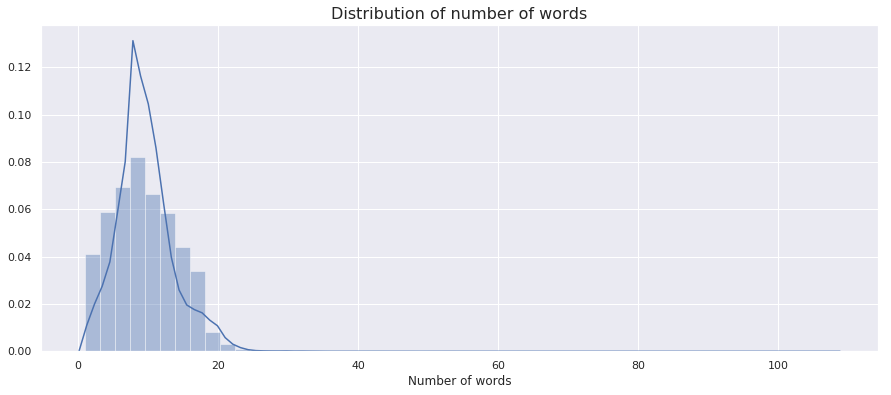

In [158]:
document_lengths = np.array(list(map(len, train_df.clean_text.str.split(' '))))

fig, ax = plt.subplots(figsize=(15,6))
ax.set_title("Distribution of number of words", fontsize=16)
ax.set_xlabel("Number of words")
sns.distplot(document_lengths, bins=50, ax=ax)

```python
# padding for word embedding
```

In [16]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

MAX_SEQUENCE_LENGTH = 20

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['clean_text'])
sequences = tokenizer.texts_to_sequences(train_df['clean_text'])

word_index = tokenizer.word_index

wordEmbedding_w2v_train = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

```python
# form embedding matrix (w2v)
```

In [17]:
embedding_matrix = np.zeros((len(word_index) + 1, vector_dim))
missingWord = []
for word, i in tqdm(word_index.items()):
    try:
        embedding_vector = word2vec_model.wv[word]
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    except:
        missingWord.append(word)

100%|██████████| 137679/137679 [00:00<00:00, 156149.00it/s]


In [18]:
len(missingWord)

2359

In [19]:
print(missingWord)

['3', '1', '2', '0', '10', '4', '5', '6', 'in', '7', '8', 'a', 'the', 'anti', '13', '14', '11', 'alyssa', '9', 'all', '12', 'to', '24', '17', '15', '20', '16', 'one', '22', 'mythings', 'livered', 'no', 'off', 'on', '21', '18', 'dvn', '25', 'en', 'offl', '23', 'of', 'us', '30', 'it', 'fadnavis', '2017', '26', 'bighit', 'asli', 'mikel', 'jollett', 'trainsec', '28', 'you', '19', '27', 'until', '0hour1', 'and', 'two', 'minus', 'gauahar', 'makada', '800', 'uki', 'mcmullin', 'wannaone', 'cockerton', 'youngking', 'morake', 'ups', '2018', 'ten', 'الجماعة', 'sacrebleu', '50', 'dominiquep', 'oneplus', 'by', 'bakari', 'blizzard', 'الاحمدية', 'gatto', '34', 'putinrf', '33', 'forever', '40', 'me', 'gregabbott', '45', 'mariotti', 'martintruex', 'hensel', 'mandhana', 'smriti', 'crimminds', 'ravindersingh', 'spicier', 'chastain', 'bomani', 'anna', 'teddyb', 'we', '95', 'yuji', 'kartikeyan', 'realdonad', 'oxchambo', 'blackink', 'bangyongguk', '96', 'for', 'erotik', 'nawazuddin', 'dkarma', '29', 'zamo',

### Modeling

#### Preparing training data

In [20]:
# for a classificaiton problem, you need to provide both training & testing data
div = int(train_df.shape[0]*0.8)

BOW_X_train = BOW_train[:div]
BOW_y_train = train_df['emotion'][:div]

BOW_X_test = BOW_train[div:]
BOW_y_test = train_df['emotion'][div:]

## take a look at data dimension is a good habbit  :)
print('BOW_X_train.shape: ', BOW_X_train.shape)
print('BOW_y_train.shape: ', BOW_y_train.shape)
print('BOW_X_test.shape: ', BOW_X_test.shape)
print('BOW_y_test.shape: ', BOW_y_test.shape)

BOW_X_train.shape:  (1164450, 3000)
BOW_y_train.shape:  (1164450,)
BOW_X_test.shape:  (291113, 3000)
BOW_y_test.shape:  (291113,)


In [21]:
# for a classificaiton problem, you need to provide both training & testing data
div = int(train_df.shape[0]*0.8)

w2v_X_train = w2v_train[:div]
w2v_y_train = train_df['emotion'][:div]

w2v_X_test = w2v_train[div:]
w2v_y_test = train_df['emotion'][div:]

## take a look at data dimension is a good habbit  :)
print('w2v_X_train.shape: ', w2v_X_train.shape)
print('w2v_y_train.shape: ', w2v_y_train.shape)
print('w2v_X_test.shape: ', w2v_X_test.shape)
print('w2v_y_test.shape: ', w2v_y_test.shape)

w2v_X_train.shape:  (1164450, 50)
w2v_y_train.shape:  (1164450,)
w2v_X_test.shape:  (291113, 50)
w2v_y_test.shape:  (291113,)


In [22]:
# for a classificaiton problem, you need to provide both training & testing data
div = int(train_df.shape[0]*0.8)

glove_X_train = glove_train[:div]
glove_y_train = train_df['emotion'][:div]

glove_X_test = glove_train[div:]
glove_y_test = train_df['emotion'][div:]

## take a look at data dimension is a good habbit  :)
print('w2v_X_train.shape: ', glove_X_train.shape)
print('w2v_y_train.shape: ', glove_y_train.shape)
print('w2v_X_test.shape: ', glove_X_test.shape)
print('w2v_y_test.shape: ', glove_y_test.shape)

w2v_X_train.shape:  (1164450, 50)
w2v_y_train.shape:  (1164450,)
w2v_X_test.shape:  (291113, 50)
w2v_y_test.shape:  (291113,)


In [23]:
# for a classificaiton problem, you need to provide both training & testing data
div = int(train_df.shape[0]*0.8)

wordEmbedding_w2v_X_train = wordEmbedding_w2v_train[:div]
wordEmbedding_w2v_y_train = train_df['emotion'][:div]

wordEmbedding_w2v_X_test = wordEmbedding_w2v_train[div:]
wordEmbedding_w2v_y_test = train_df['emotion'][div:]

## take a look at data dimension is a good habbit  :)
print('w2v_X_train.shape: ', wordEmbedding_w2v_X_train.shape)
print('w2v_y_train.shape: ', wordEmbedding_w2v_y_train.shape)
print('w2v_X_test.shape: ', wordEmbedding_w2v_X_test.shape)
print('w2v_y_test.shape: ', wordEmbedding_w2v_y_test.shape)

w2v_X_train.shape:  (1164450, 20)
w2v_y_train.shape:  (1164450,)
w2v_X_test.shape:  (291113, 20)
w2v_y_test.shape:  (291113,)


#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(BOW_X_train, BOW_y_train)

## predict!
BOW_Tree_y_train_pred = DT_model.predict(BOW_X_train)
BOW_Tree_y_test_pred = DT_model.predict(BOW_X_test)

# check statistical results
## precision, recall, f1-score,
from sklearn.metrics import classification_report
print(classification_report(y_true=BOW_Tree_y_test, y_pred=BOW_Tree_y_test_pred))

#### Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(BOW_X_train, BOW_y_train)

## predict!
BOW_naive_y_train_pred = clf.predict(BOW_X_train)
BOW_naive__y_test_pred = clf.predict(BOW_X_test)

# check statistical results
## precision, recall, f1-score,
from sklearn.metrics import classification_report
print(classification_report(y_true=BOW_naive_y_test, y_pred=BOW_naive_y_test_pred))

#### Deep learning - Dense

##### BOW

In [33]:
import keras
from sklearn.preprocessing import LabelEncoder

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

In [36]:
def encode(y_train, y_test):
    label_encoder = LabelEncoder()
    label_encoder.fit(y_train)
    print('check label: ', label_encoder.classes_)
    print('\n## Before convert')
    print('y_train[0:4]:\n', y_train[0:4])
    print('\ny_train.shape: ', y_train.shape)
    print('y_test.shape: ', y_test.shape)

    re_y_train = label_encode(label_encoder, y_train)
    re_y_test = label_encode(label_encoder, y_test)

    print('\n\n## After convert')
    print('y_train[0:4]:\n', y_train[0:4])
    print('\ny_train.shape: ', y_train.shape)
    print('y_test.shape: ', y_test.shape)
    
    return re_y_train, re_y_test, label_encoder

In [37]:
le_BOW_y_train, le_BOW_y_test, label_encoder = encode(BOW_y_train, BOW_y_test)

check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']

## Before convert
y_train[0:4]:
 0    anticipation
1         sadness
2            fear
3             joy
Name: emotion, dtype: object

y_train.shape:  (1164450,)
y_test.shape:  (291113,)


## After convert
y_train[0:4]:
 0    anticipation
1         sadness
2            fear
3             joy
Name: emotion, dtype: object

y_train.shape:  (1164450,)
y_test.shape:  (291113,)


In [38]:
# I/O check
input_shape = BOW_X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  3000
output_shape:  8


In [39]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras import regularizers

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
# X_Batch = BatchNormalization()(X)
X_W1 = Dense(units=384, kernel_regularizer = regularizers.l2(0.001))(X)  # 64
H1 = BatchNormalization()(X_W1)
H1 = ReLU()(H1)
H1_Drop = Dropout(0.5)(H1)

# 2nd hidden layer
H1_W2 = Dense(units=384, kernel_regularizer = regularizers.l2(0.001))(H1_Drop)  # 64
H2 = BatchNormalization()(H1_W2)
H2 = ReLU()(H2)
H2_Drop = Dropout(0.5)(H2)

H2_W3 = Dense(units=48, kernel_regularizer = regularizers.l2(0.001))(H2_Drop)  # 64
H3 = BatchNormalization()(H2_W3)
H3 = ReLU()(H3)
H3_Drop = Dropout(0.5)(H3)

H3_W4 = Dense(units=48, kernel_regularizer = regularizers.l2(0.001))(H3_Drop)  # 64
H4 = BatchNormalization()(H3_W4)
H4 = ReLU()(H4)
H4_Drop = Dropout(0.5)(H4)

# output layer
H4_W5 = Dense(units=output_shape, kernel_regularizer = regularizers.l2(0.001))(H4_Drop)  # 4
H5 = Softmax()(H4_W5)

model_output = H5

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
adam = optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)

# loss function & optimizer
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 384)               1152384   
_________________________________________________________________
batch_normalization_1 (Batch (None, 384)               1536      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 384)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 384)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 384)               147840    
_________________________________________________________________
batch_normalization_2 (Batch (None, 384)               1536      
__________

In [40]:
epochs = 3
batch_size = 128
history = model.fit(BOW_X_train, le_BOW_y_train, epochs=epochs, batch_size=batch_size,
                    validation_data = (BOW_X_test, le_BOW_y_test))

Train on 1164450 samples, validate on 291113 samples
Epoch 1/3
1164450/1164450 [==============================] - 168s 144us/step - loss: 1.7666 - acc: 0.4491 - val_loss: 1.4972 - val_acc: 0.5036
Epoch 2/3
1164450/1164450 [==============================] - 161s 138us/step - loss: 1.5619 - acc: 0.4826 - val_loss: 1.4847 - val_acc: 0.5074
Epoch 3/3
1164450/1164450 [==============================] - 162s 139us/step - loss: 1.5528 - acc: 0.4860 - val_loss: 1.4772 - val_acc: 0.5112


In [42]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

y_pred_result = model.predict(x = BOW_X_test, batch_size=128)
y_pred_result = label_decode(label_encoder, y_pred_result)
print(classification_report(y_true=BOW_y_test, y_pred=y_pred_result))

              precision    recall  f1-score   support

       anger       0.82      0.08      0.15      8003
anticipation       0.63      0.48      0.54     49901
     disgust       0.42      0.31      0.36     27449
        fear       0.80      0.26      0.39     12844
         joy       0.48      0.87      0.61    103127
     sadness       0.52      0.38      0.44     38638
    surprise       0.76      0.10      0.17      9816
       trust       0.69      0.18      0.29     41335

   micro avg       0.51      0.51      0.51    291113
   macro avg       0.64      0.33      0.37    291113
weighted avg       0.57      0.51      0.47    291113



##### w2v

In [41]:
le_w2v_y_train, le_w2v_y_test, label_encoder = encode(w2v_y_train, w2v_y_test)

check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']

## Before convert
y_train[0:4]:
 0    anticipation
1         sadness
2            fear
3             joy
Name: emotion, dtype: object

y_train.shape:  (1164450,)
y_test.shape:  (291113,)


## After convert
y_train[0:4]:
 0    anticipation
1         sadness
2            fear
3             joy
Name: emotion, dtype: object

y_train.shape:  (1164450,)
y_test.shape:  (291113,)


In [43]:
# I/O check
input_shape = w2v_X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  50
output_shape:  8


In [44]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras import regularizers

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
# X_Batch = BatchNormalization()(X)
X_W1 = Dense(units=384, kernel_regularizer = regularizers.l2(0.001))(X)  # 64
H1 = BatchNormalization()(X_W1)
H1 = ReLU()(H1)
H1_Drop = Dropout(0.5)(H1)

# 2nd hidden layer
H1_W2 = Dense(units=384, kernel_regularizer = regularizers.l2(0.001))(H1_Drop)  # 64
H2 = BatchNormalization()(H1_W2)
H2 = ReLU()(H2)
H2_Drop = Dropout(0.5)(H2)

H2_W3 = Dense(units=48, kernel_regularizer = regularizers.l2(0.001))(H2_Drop)  # 64
H3 = BatchNormalization()(H2_W3)
H3 = ReLU()(H3)
H3_Drop = Dropout(0.5)(H3)

H3_W4 = Dense(units=48, kernel_regularizer = regularizers.l2(0.001))(H3_Drop)  # 64
H4 = BatchNormalization()(H3_W4)
H4 = ReLU()(H4)
H4_Drop = Dropout(0.5)(H4)

# output layer
H4_W5 = Dense(units=output_shape, kernel_regularizer = regularizers.l2(0.001))(H4_Drop)  # 4
H5 = Softmax()(H4_W5)

model_output = H5

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
adam = optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)

# loss function & optimizer
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 384)               19584     
_________________________________________________________________
batch_normalization_5 (Batch (None, 384)               1536      
_________________________________________________________________
re_lu_5 (ReLU)               (None, 384)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 384)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 384)               147840    
_________________________________________________________________
batch_normalization_6 (Batch (None, 384)               1536      
__________

In [45]:
epochs = 3
batch_size = 128
history = model.fit(w2v_X_train, le_w2v_y_train, epochs=epochs, batch_size=batch_size,
                    validation_data = (w2v_X_test, le_w2v_y_test))

Train on 1164450 samples, validate on 291113 samples
Epoch 1/3
1164450/1164450 [==============================] - 129s 111us/step - loss: 1.8915 - acc: 0.3588 - val_loss: 1.7621 - val_acc: 0.3633
Epoch 2/3
1164450/1164450 [==============================] - 129s 111us/step - loss: 1.7461 - acc: 0.3731 - val_loss: 1.7270 - val_acc: 0.3743
Epoch 3/3
1164450/1164450 [==============================] - 129s 111us/step - loss: 1.7365 - acc: 0.3755 - val_loss: 1.7233 - val_acc: 0.3743


In [46]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

y_pred_result = model.predict(x = w2v_X_test, batch_size=128)
y_pred_result = label_decode(label_encoder, y_pred_result)
print(classification_report(y_true=w2v_y_test, y_pred=y_pred_result))

/home/lu/anaconda3/envs/NTHU_DataMining/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

       anger       0.96      0.04      0.08      8003
anticipation       0.79      0.07      0.14     49901
     disgust       0.00      0.00      0.00     27449
        fear       0.30      0.01      0.01     12844
         joy       0.36      0.99      0.53    103127
     sadness       0.56      0.06      0.11     38638
    surprise       0.00      0.00      0.00      9816
       trust       0.00      0.00      0.00     41335

   micro avg       0.37      0.37      0.37    291113
   macro avg       0.37      0.15      0.11    291113
weighted avg       0.38      0.37      0.23    291113



#### Deep learning - LSTM

In [49]:
le_wordEmbedding_w2v_y_train, le_wordEmbedding_w2v_y_test, label_encoder = encode(wordEmbedding_w2v_y_train, wordEmbedding_w2v_y_test)

check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']

## Before convert
y_train[0:4]:
 0    anticipation
1         sadness
2            fear
3             joy
Name: emotion, dtype: object

y_train.shape:  (1164450,)
y_test.shape:  (291113,)


## After convert
y_train[0:4]:
 0    anticipation
1         sadness
2            fear
3             joy
Name: emotion, dtype: object

y_train.shape:  (1164450,)
y_test.shape:  (291113,)


In [50]:
# I/O check
input_shape = wordEmbedding_w2v_X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  20
output_shape:  8


In [51]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, Dropout, Activation, ActivityRegularization, SpatialDropout1D
from keras.layers.embeddings import Embedding
from keras.regularizers import l2
from keras.initializers import Constant
from keras import optimizers

model = Sequential()
model.add(Embedding(len(word_index) + 1,
                            vector_dim,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False))
# model.add(SpatialDropout1D(0.7))
model.add(LSTM(512, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

adam = optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 50)            6884000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 512)               1153024   
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 2056      
Total params: 8,170,408
Trainable params: 1,286,408
Non-trainable params: 6,884,000
_________________________________________________________________


In [52]:
epochs = 3
batch_size = 128
history = model.fit(wordEmbedding_w2v_X_train, le_wordEmbedding_w2v_y_train, epochs=epochs, batch_size=batch_size,
                    validation_data = (wordEmbedding_w2v_X_test, le_wordEmbedding_w2v_y_test))

Train on 1164450 samples, validate on 291113 samples
Epoch 1/3
1164450/1164450 [==============================] - 478s 410us/step - loss: 1.3187 - acc: 0.5219 - val_loss: 1.2277 - val_acc: 0.5534
Epoch 2/3
 131072/1164450 [==>...........................] - ETA: 6:21 - loss: 1.2553 - acc: 0.5447

KeyboardInterrupt: 

In [53]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

y_pred_result = model.predict(x = wordEmbedding_w2v_X_test, batch_size=128)
y_pred_result = label_decode(label_encoder, y_pred_result)
print(classification_report(y_true=wordEmbedding_w2v_y_test, y_pred=y_pred_result))

              precision    recall  f1-score   support

       anger       0.58      0.23      0.33      8003
anticipation       0.63      0.56      0.59     49901
     disgust       0.42      0.46      0.44     27449
        fear       0.74      0.36      0.48     12844
         joy       0.55      0.82      0.66    103127
     sadness       0.51      0.47      0.49     38638
    surprise       0.76      0.17      0.28      9816
       trust       0.66      0.25      0.36     41335

   micro avg       0.56      0.56      0.56    291113
   macro avg       0.61      0.41      0.45    291113
weighted avg       0.58      0.56      0.53    291113

